In [47]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
dataset = pd.read_csv("..\datos_sin_procesar\dataset_phishing.csv")
dataset

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


## 1. Información básica del dataset

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Se puede observar que no hay datos faltantes y que solo hay dos columnas categóricas: url y status

## 2. Limpieza de datos

#### 2.1 Eliminando columnas irrelevantes

Se elimina la columna url, ya que no es muy util para realizar la clasificación

In [50]:
dataset.drop(columns=['url'], axis=1, inplace=True)

#### 2.2 Si hay filas repetidas, se eliminan

In [51]:
print('Tamaño del dataset antes de eliminar las filas repetidas: {}'.format(dataset.shape))
dataset.drop_duplicates(inplace=True)
print('Tamaño del dataset después de eliminar las filas repetidas: {}'.format(dataset.shape))

Tamaño del dataset antes de eliminar las filas repetidas: (11430, 88)
Tamaño del dataset después de eliminar las filas repetidas: (11256, 88)


Se puede observar que habían 174 registros repetidos

#### 2.3 Convirtiendo la columna status en variable numérica

In [52]:
dataset['status'].unique()
dic_valores = {
    'legitimate':0,
    'phishing':1
}
dataset['status'] = dataset['status'].map(dic_valores)


Cuando el correo es phishing, obtendrá un valor de 1. Cuando es un correo real, obtendrá un valor de 0

#### 2.4. Se verifica la cantidad de correos legítimos y de fishing. 

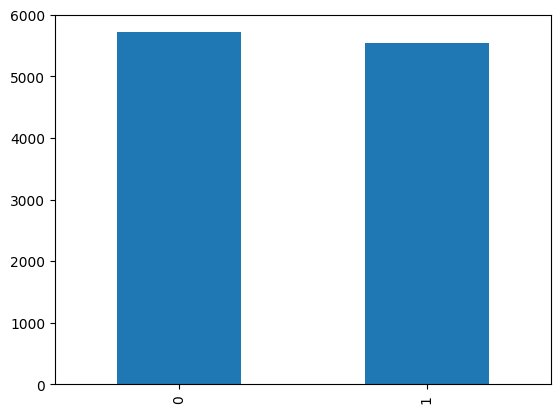

In [53]:
dataset.status.value_counts().plot(kind='bar')
plt.show()

Se puede apreciar que la variable a predecir está bien balanceada

#### 2.4. Se guarda el dataset procesado

In [54]:
dataset.to_csv('..\datos_procesados\datos_procesados.csv', index=False, sep=';')